# Using Vision based LLMs with Langchain (Ollama for local models)

Based on the official [documentation](https://python.langchain.com/docs/integrations/llms/ollama/#multi-modal) with some QoL improvements

## Pre-requisites

This is a [Jupyter Notebook](https://jupyter.org/), you can open it in Visual Studio Code, make sure you have the [extension](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter) 
1. Install [Ollama](https://ollama.com/download)
2. Python environment (Preferrably new one with [miniconda](https://docs.anaconda.com/free/miniconda/miniconda-install/))
3. Install below packages

In [ ]:
!pip install langchain
!pip install ipywidgets
!pip install Pillow

## Code

In [1]:
from langchain_community.llms import Ollama

# Here we are using the llava model. 
# make sure llava is downloaded in ollama using the command `ollama pull llava`
llm = Ollama(model="llava")

In [2]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))

In [3]:
from ipywidgets import FileUpload

upload = FileUpload()
upload

FileUpload(value=(), description='Upload')


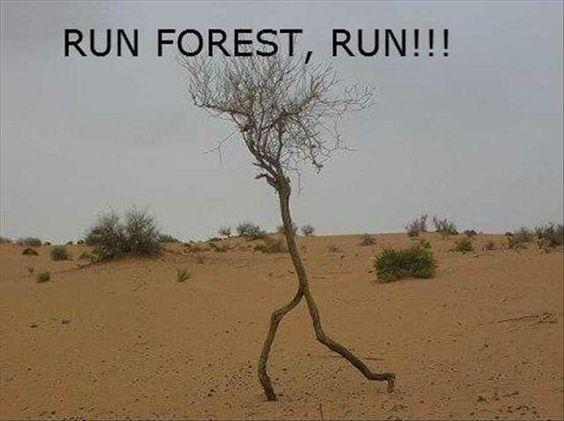

In [14]:
image = Image.open(BytesIO(upload.value[0]['content']))

#Display the image
plt_img_base64(convert_to_base64(image.convert("RGB")))


In [15]:
image = Image.open(BytesIO(upload.value[0]['content']))
image = image.convert("RGB")  # Convert image to RGB format
image_b64 = convert_to_base64(image)
llm_with_image_context = llm.bind(images=[image_b64])
llm_with_image_context.invoke("what is in the picture")

' The image shows a tree with a human figure drawn on it, which resembles a person walking through what appears to be a desert landscape. Overlaying the picture is a meme text that reads "RUN FOREST, RUN!!!". This phrase is often used in internet culture to express an overwhelming desire or need for action, usually in response to a perceived threat or urgency. '

In [16]:
# you can continue asking followup questions
llm_with_image_context.invoke("What is funny about the picture?")

' The humor in the picture comes from a juxtaposition. It shows an image of what appears to be a desert landscape, but with a small tree that has been digitally manipulated to look like it is walking in a human-like manner, as if it were running away from the viewer.\n\nThe text on the image reads "RUN FOREST, RUN!!!!" which mimics the urgency of a call for help. The phrase is commonly used on social media to express concern or dismay at an issue, but here it\'s humorously applied to the tree, creating a comical and unexpected situation.\n\nThe image plays on the idea of personification—giving human characteristics to non-human objects—which can be funny because it creates a sense of anthropomorphism, attributing human traits and emotions to inanimate or natural entities. In this case, it\'s a tree that has been given the appearance of running away from danger, which is an absurd and amusing visual pun. '